In [14]:
import skimage
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [214]:
from skimage import measure
from skimage.color import rgb2gray
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank

In [215]:
MAX_SIZE = 300
OTSU_DISK_SIZE = 15
AREA_THR = 0.01

In [295]:
DATA_FOLDER = '../../../../../datasets/icv_cards/first_iter' #first_iter, zero_iter
images = glob(DATA_FOLDER + '/*')

In [296]:
def adaptive_downscale(x):
    factor = 1
    while np.max(np.array(x.shape)/factor) > MAX_SIZE:
        factor += 1
    if factor > 1:
        print(f'rescaled input with factor {factor}')
    return skimage.transform.downscale_local_mean(x, factors=factor), factor

def apply_otsu(x):
    x = (x * 256).astype(int)
    radius = 9
    selem = disk(radius)
    print(np.max(x), np.min(x))
    local_otsu = rank.otsu(x, selem)
    return x >= local_otsu

In [297]:
image_path = images[-5]

rescaled input with factor 14
226 8
(161, 286)


/tmp/ipykernel_66/4175065955.py:14: UserWarning: Possible precision loss converting image of type int64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  local_otsu = rank.otsu(x, selem)
/opt/conda/lib/python3.10/site-packages/skimage/util/dtype.py:541: UserWarning: Downcasting int64 to uint8 without scaling because max value 226 fits in uint8
  return _convert(image, np.uint8, force_copy)


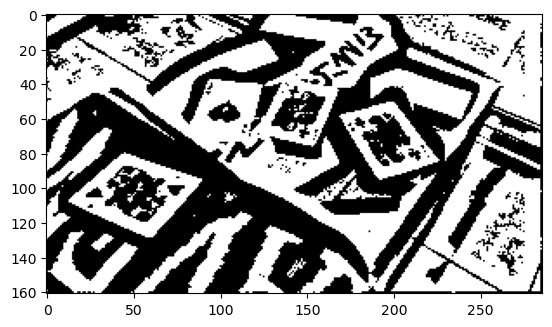

In [317]:
image, factor = adaptive_downscale(rgb2gray(skimage.io.imread(image_path)))
#
image = apply_otsu(image)
print(image.shape)
plt.imshow(image, cmap='gray')

In [318]:
plot_img = skimage.transform.downscale_local_mean(skimage.io.imread(image_path), factors=(factor, factor,1)).astype(int) #for a nice plot
orig_img = skimage.io.imread(image_path) #for a nice plot

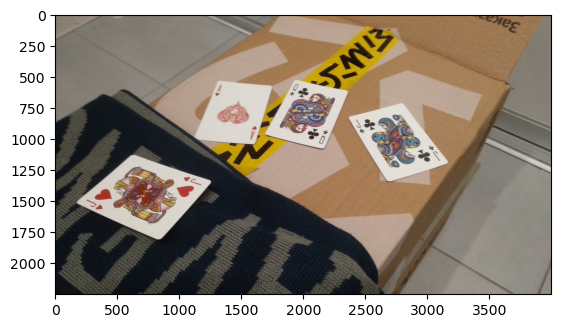

In [319]:
plt.imshow(orig_img)

In [320]:
contours = measure.find_contours(image, 0.2)

In [321]:
len(contours)

333

In [322]:
a = np.array([[4,5],[1,2], [3,4]])
a.argmin()

2

In [323]:
AREA_THR * image.shape[0] * image.shape[1]

460.46000000000004

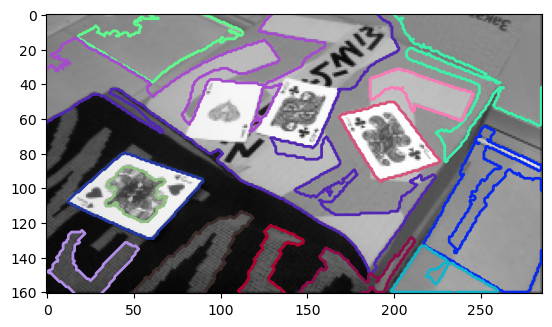

In [330]:
fig, ax = plt.subplots()
ax.imshow(rgb2gray(plot_img), cmap=plt.cm.gray)
max_area = 0 
nice_contours = []
for contour in contours:
    c = np.expand_dims(contour.astype(np.float32), 1)
    # Convert it to UMat object
    c = cv2.UMat(c)
    area = cv2.contourArea(c)
    if area < AREA_THR * image.shape[0] * image.shape[1]:
        continue
    nice_contours.append(contour)
    #print(contour.shape)
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, c=np.random.uniform(0,1,size=(3)))

In [327]:
#get bb crops

# we crop from an original image
bb_crops = []

def do_scale(x, factor):
    return int(x * factor)

for c in nice_contours:
    x_min, x_max = np.min(c[:, 0]), np.max(c[:, 0])
    y_min, y_max = np.min(c[:, 1]), np.max(c[:, 1])
    x_min = do_scale(x_min, factor)
    x_max = do_scale(x_max, factor)
    y_min = do_scale(y_min, factor)
    y_max = do_scale(y_max, factor)
    bb_crops.append(orig_img[x_min:x_max, y_min:y_max, :])

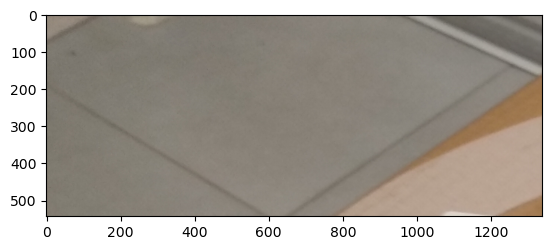

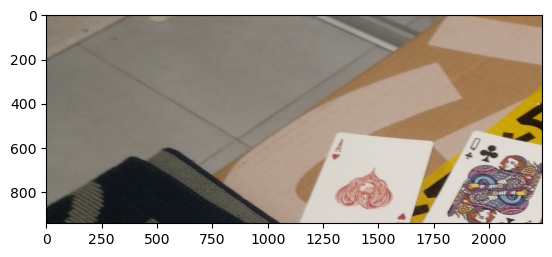

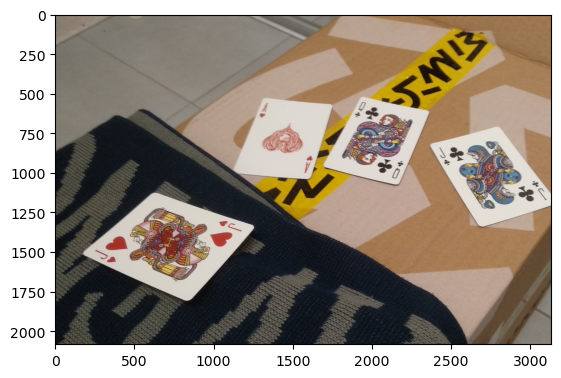

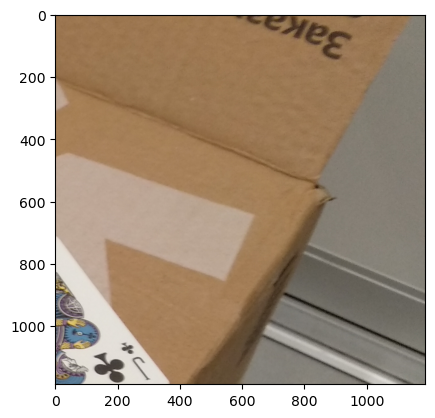

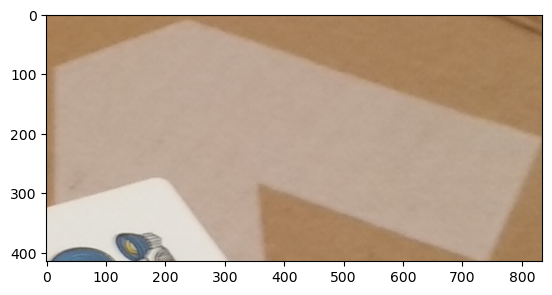

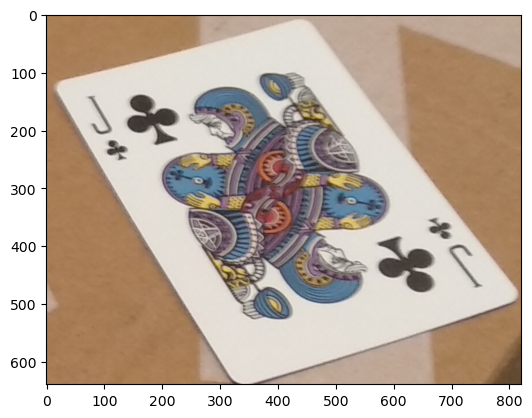

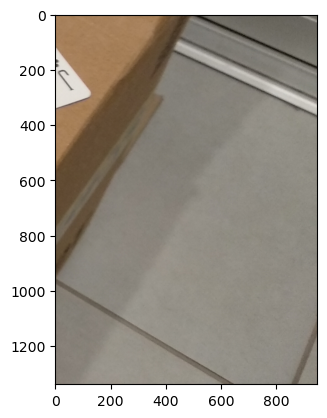

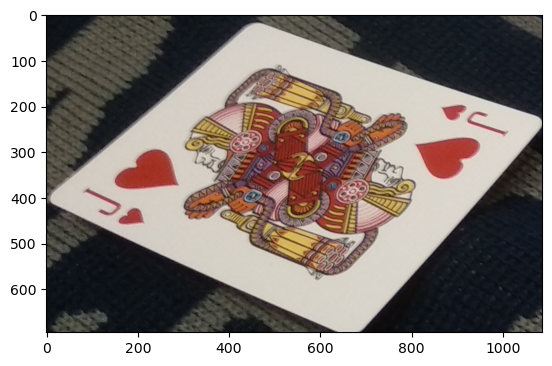

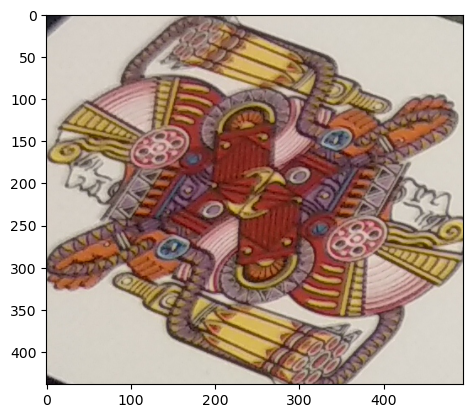

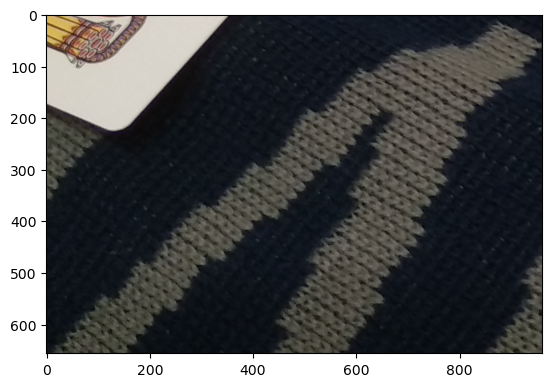

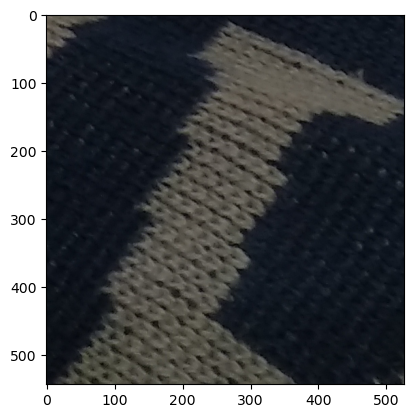

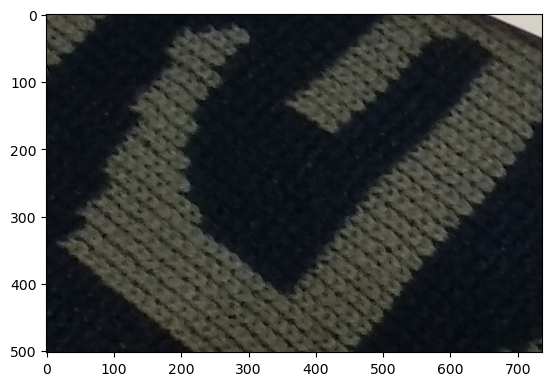

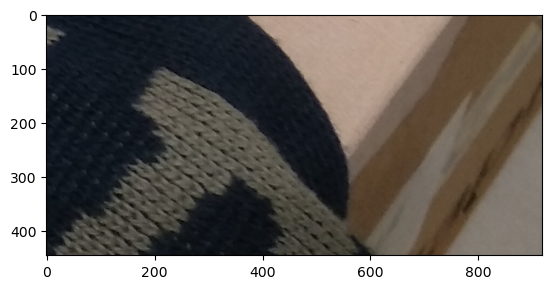

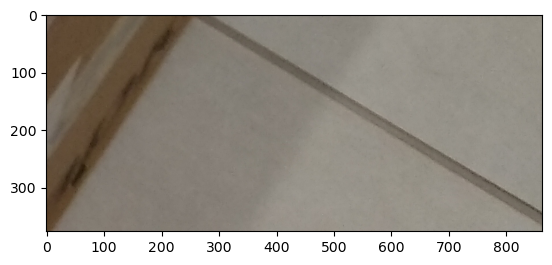

In [329]:
for cr in bb_crops:
    plt.imshow(cr)
    plt.show()